Importacion de Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from keras.optimizers import Adam


In [2]:
def remove_labels(df, label_name):
    X = df.drop(label_name, axis=1)
    y = df[label_name].copy()
    return (X, y)

def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

def calcular_metricas(y_true, y_pred):
    metricas = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='macro'),
        'Recall': recall_score(y_true, y_pred, average='macro'),
        'F1 Score': f1_score(y_true, y_pred, average='macro')
    }
    return metricas
def plot_confusion_matrix(y_true, y_pred, title='Matriz de Confusión'):
    matriz = confusion_matrix(y_true, y_pred)
    etiquetas = ['Negativo', 'Neutro', 'Positivo']
    plt.figure(figsize=(10, 7))
    sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', xticklabels=etiquetas, yticklabels=etiquetas)
    plt.xlabel('Predicciones')
    plt.ylabel('Valores Verdaderos')
    plt.title(title)
    plt.show()

# Cargamos los datos

In [3]:
df = pd.read_csv('Datasets/emotions.csv')
df

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90,NEUTRAL
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00,POSITIVE
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00,NEGATIVE
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00,NEGATIVE


# Visualizacion de Datos

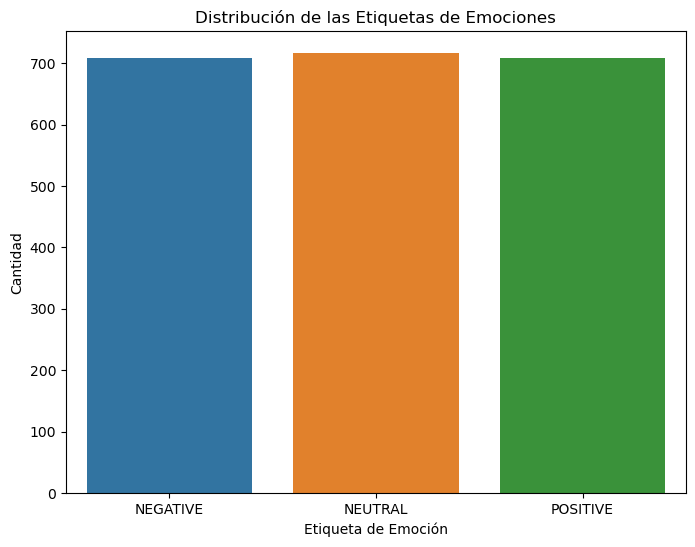

In [4]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Distribución de las Etiquetas de Emociones')
plt.xlabel('Etiqueta de Emoción')
plt.ylabel('Cantidad')
plt.show()

In [5]:
df['label'].value_counts()

NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: label, dtype: int64

In [6]:
df.isnull().sum()

# mean_0_a    0
mean_1_a      0
mean_2_a      0
mean_3_a      0
mean_4_a      0
             ..
fft_746_b     0
fft_747_b     0
fft_748_b     0
fft_749_b     0
label         0
Length: 2549, dtype: int64

Vamos a ver la serie temporal de nuestas emociones por cada individuo

Individuo A

In [7]:
individuoA_positivo = df.loc[df["label"]=="POSITIVE"]
sampleA_positivo = individuoA_positivo.loc[2, 'fft_0_a':'fft_749_a']
individuoA_neutral = df.loc[df["label"]=="NEUTRAL"]
sampleA_neu = individuoA_neutral.loc[1, 'fft_0_a':'fft_749_a']
individuoA_negativo = df.loc[df["label"]=="NEGATIVE"]
sampleA_neg = individuoA_negativo.loc[0, 'fft_0_a':'fft_749_a']

In [8]:
individuoB_positivo = df.loc[df["label"]=="POSITIVE"]
sampleB_pos = individuoB_positivo.loc[2, 'fft_0_b':'fft_749_b']
individuoB_neutral = df.loc[df["label"]=="NEUTRAL"]
sampleB_neu = individuoB_neutral.loc[1, 'fft_0_b':'fft_749_b']
individuoB_negativo = df.loc[df["label"]=="NEGATIVE"]
sampleB_neg = individuoB_negativo.loc[0, 'fft_0_b':'fft_749_b']

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_11368\2496582351.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


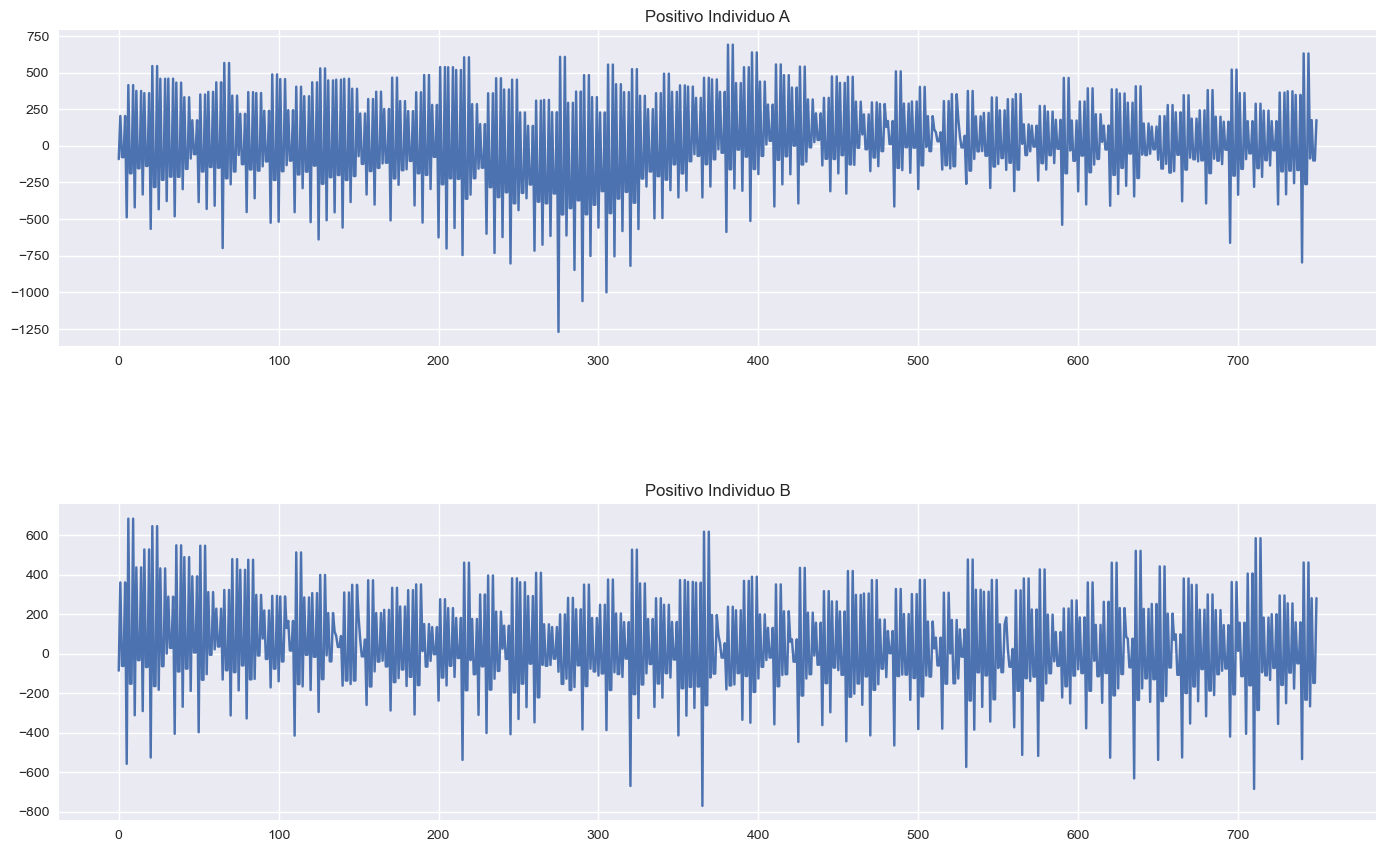

In [9]:
plt.style.use('seaborn')
fig, axs = plt.subplots(2, figsize=(17, 10))
fig.subplots_adjust(top=0.9, hspace=0.5) 
axs[0].plot(range(len(sampleA_positivo)), sampleA_positivo)
axs[0].set_title('Positivo Individuo A')
axs[1].plot(range(len(sampleB_pos)), sampleB_pos)
axs[1].set_title('Positivo Individuo B')

plt.show()

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_11368\1698510148.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


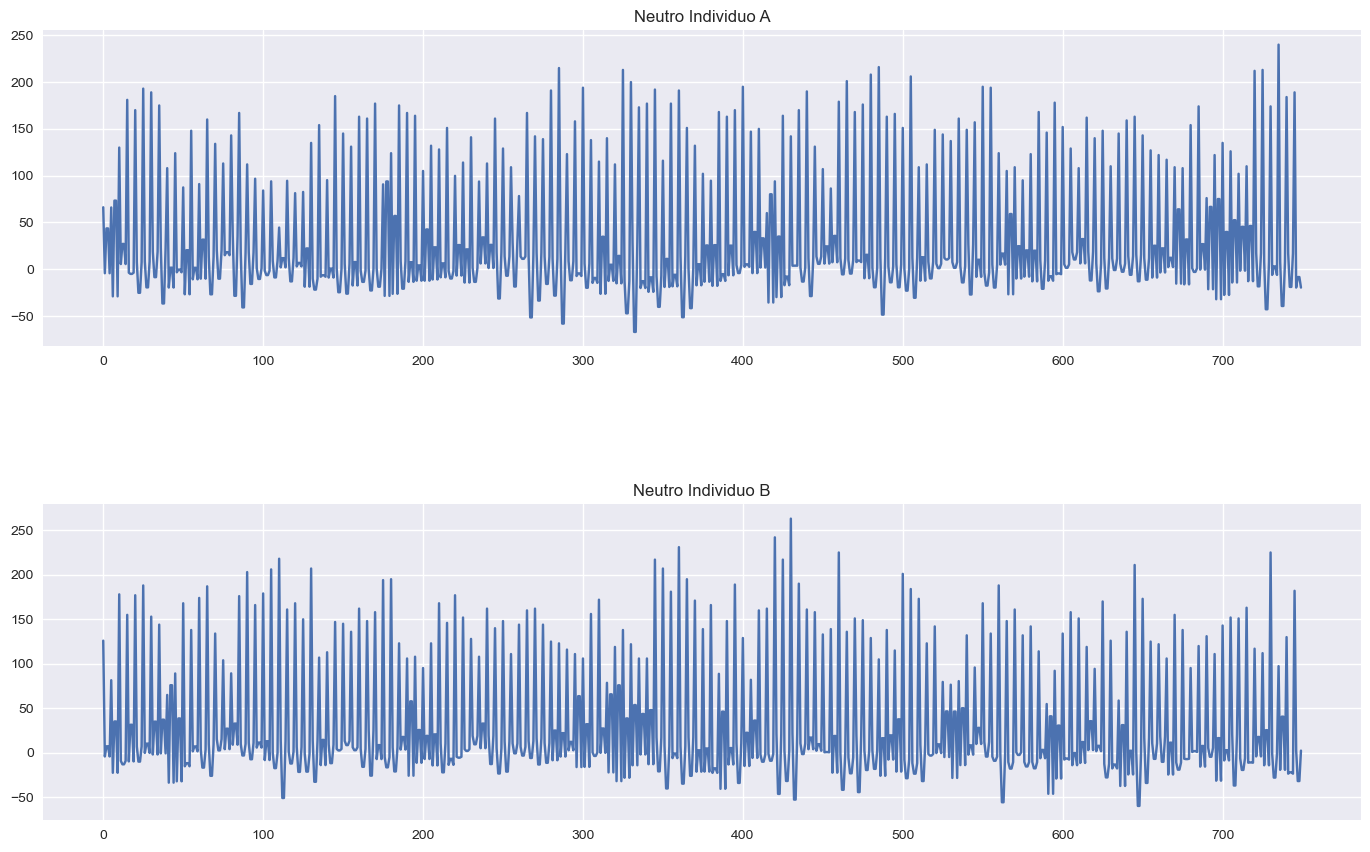

In [10]:
plt.style.use('seaborn')
fig, axs = plt.subplots(2, figsize=(17, 10))
fig.subplots_adjust(top=0.9, hspace=0.5) 
axs[0].plot(range(len(sampleA_neu)), sampleA_neu)
axs[0].set_title('Neutro Individuo A')
axs[1].plot(range(len(sampleB_neu)), sampleB_neu)
axs[1].set_title('Neutro Individuo B')

plt.show()

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_11368\2425062642.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


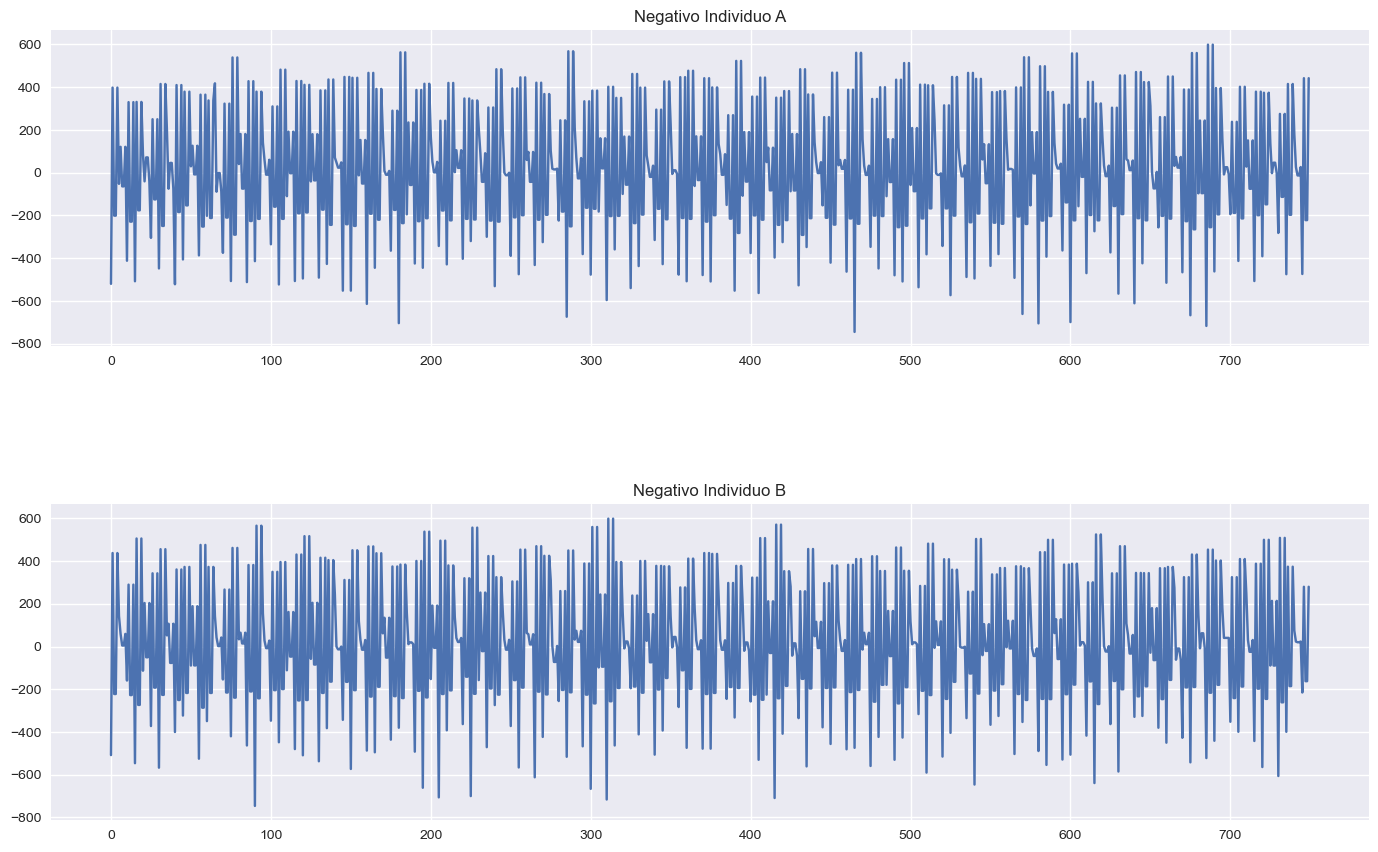

In [11]:
plt.style.use('seaborn')
fig, axs = plt.subplots(2, figsize=(17, 10))
fig.subplots_adjust(top=0.9, hspace=0.5) 
axs[0].plot(range(len(sampleA_neg)), sampleA_neg)
axs[0].set_title('Negativo Individuo A')
axs[1].plot(range(len(sampleB_neg)), sampleB_neg)
axs[1].set_title('Negativo Individuo B')

plt.show()

Se puede observar cierta relacion en las senales para ambos individuos. 

Positivas:
   - Son mayores a 500 y menores a -750 
   
Neutras:
   - Comprendidas entre 250 y -50
   
Negativas:
   - Comprendidas entre 500 y -700

In [12]:
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}
df['label'] = df['label'].map(label_mapping)

In [13]:
sample = df.loc[0, 'fft_0_b':'fft_749_b']

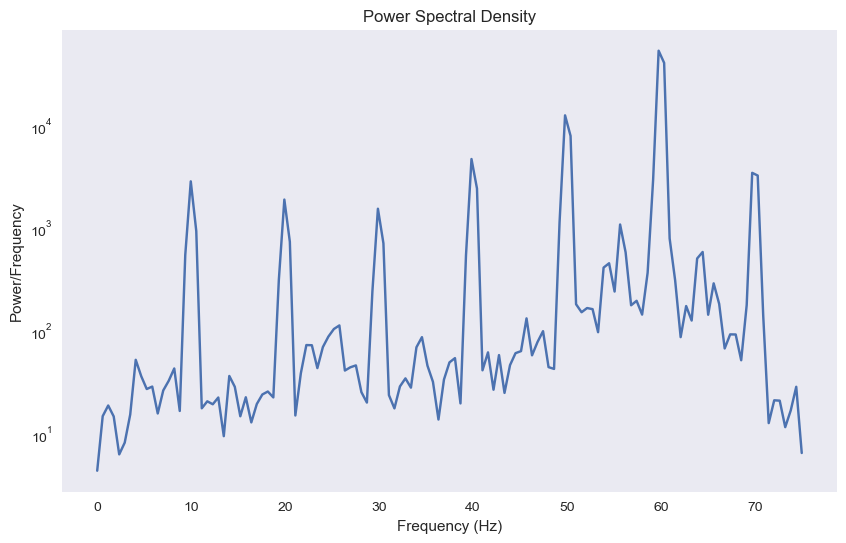

In [14]:
sampling_rate = 150 
frequencies, power_density = signal.welch(sample, fs=sampling_rate)
plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, power_density)
plt.title("Power Spectral Density")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power/Frequency")
plt.grid()
plt.show()

In [15]:
df['label']

0       0
1       1
2       2
3       2
4       1
       ..
2127    1
2128    2
2129    0
2130    0
2131    1
Name: label, Length: 2132, dtype: int64

Dividimos el conjunto de datos

# Preprocesamiento

Codificamos nuestra variable a predecir.
 - 0: Negativo
 - 1: Neutro
 - 2: Positivo

In [16]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])


# Division de los datos

In [17]:
train_set, val_set, test_set = train_val_test_split(df)

In [18]:
X_train, y_train = remove_labels(train_set, 'label')
X_val, y_val = remove_labels(val_set, 'label')
X_test, y_test = remove_labels(test_set, 'label')

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

# Anadimos ruido

In [20]:
noise_factor = 0.5

X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)

In [21]:
X_train_MLP = X_train_noisy
X_train_GRU = X_train_noisy
X_train_SVM = X_train_noisy

In [22]:
print('Longitud Entrenamiento', len(X_train_noisy))
print('Longitud Test', len(X_test))
print('Longitud Val', len(X_val))

Longitud Entrenamiento 1279
Longitud Test 427
Longitud Val 426


# Entrenamiento

# Perceptron Multicapa

In [23]:
activation = 'relu'
input_shape = X_train_MLP.shape[1]  
perceptronMulticapa = Sequential()
perceptronMulticapa.add(Dense(32, 
                               activation=activation,
                               kernel_regularizer=l1_l2(l1=1e-4, l2=1e-3),  
                               input_shape=(input_shape,)))
perceptronMulticapa.add(Dropout(0.6))  
perceptronMulticapa.add(Dense(3, activation='softmax'))
adam = Adam(learning_rate=1e-5)
perceptronMulticapa.compile(optimizer=adam,
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])

perceptronMulticapa.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, min_lr=1e-7)

history = perceptronMulticapa.fit(X_train_MLP,
                                  y_train,
                                  epochs=100,
                                  batch_size=16,
                                  validation_data=(X_val, y_val),
                                  callbacks=[early_stopping])


C:\Users\Nicolas\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │        81,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,667 (319.01 KB)

 Trainable params: 81,667 (319.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3579 - loss: 1.9522 - val_accuracy: 0.5446 - val_loss: 1.2714
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4195 - loss: 1.6372 - val_accuracy: 0.6596 - val_loss: 1.1215
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4943 - loss: 1.4888 - val_accuracy: 0.6854 - val_loss: 1.0548
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5324 - loss: 1.3742 - val_accuracy: 0.6901 - val_loss: 1.0142
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5448 - loss: 1.3480 - val_accuracy: 0.7042 - val_loss: 0.9815
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6020 - loss: 1.3250 - val_accuracy: 0.7113 - val_loss: 0.9526
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6218 - loss: 1.2442 - val_accuracy: 0.7371 - val_loss: 0.9286
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6250 - loss: 1.1814 - val_accuracy: 0.7559 - v

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8596 - loss: 0.6071 - val_accuracy: 0.9225 - val_loss: 0.5794
Epoch 52/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8573 - loss: 0.6211 - val_accuracy: 0.9225 - val_loss: 0.5770
Epoch 53/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8472 - loss: 0.6382 - val_accuracy: 0.9225 - val_loss: 0.5767
Epoch 54/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8541 - loss: 0.6444 - val_accuracy: 0.9225 - val_loss: 0.5743
Epoch 55/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8687 - loss: 0.5847 - val_accuracy: 0.9225 - val_loss: 0.5774
Epoch 56/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8293 - loss: 0.6501 - val_accuracy: 0.9202 - val_loss: 0.5757


In [24]:
y_pred_val = np.argmax(perceptronMulticapa.predict(X_val), axis=-1)
y_pred_test = np.argmax(perceptronMulticapa.predict(X_test), axis=-1)

metricas_val = calcular_metricas(y_val, y_pred_val)
metricas_test = calcular_metricas(y_test, y_pred_test)

resultados = pd.DataFrame({'Validación': metricas_val, 'Test': metricas_test})

print(resultados)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
           Validación      Test
Accuracy     0.922535  0.903981
Precision    0.931534  0.912177
Recall       0.915958  0.909472
F1 Score     0.919272  0.902995


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


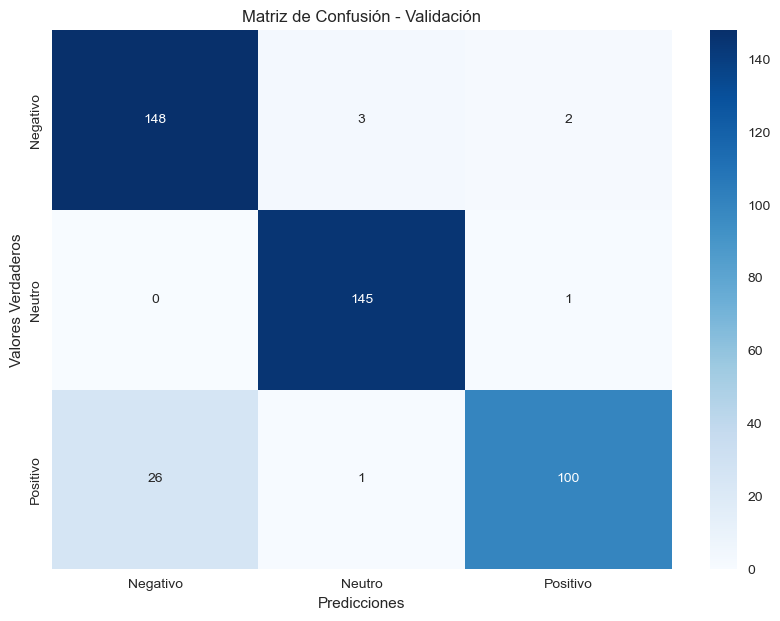

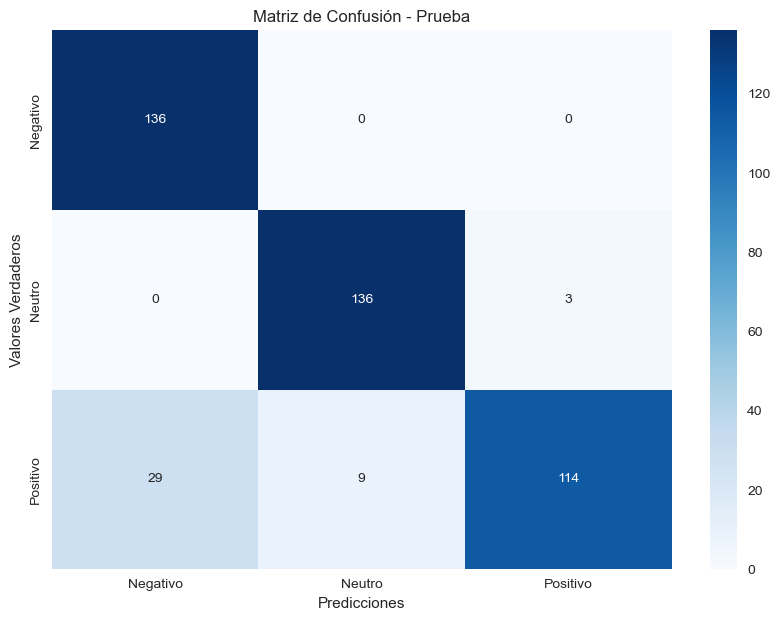

In [25]:
y_pred_val = np.argmax(perceptronMulticapa.predict(X_val), axis=-1)
y_pred_test = np.argmax(perceptronMulticapa.predict(X_test), axis=-1)

plot_confusion_matrix(y_val, y_pred_val, title='Matriz de Confusión - Validación')

plot_confusion_matrix(y_test, y_pred_test, title='Matriz de Confusión - Prueba')

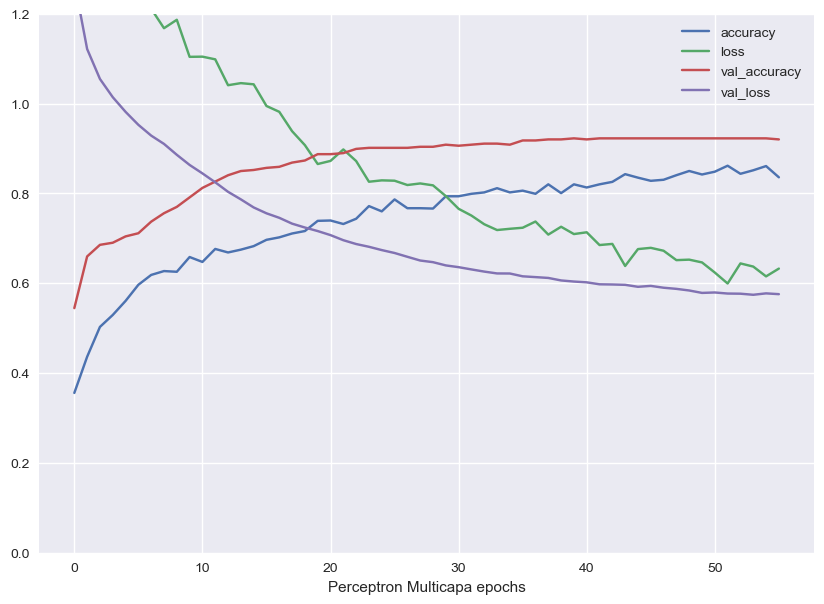

In [26]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.gca().set_ylim(0,1.2)
plt.xlabel("Perceptron Multicapa epochs")
plt.show()

# GRU

In [27]:
inputs = tf.keras.Input(shape=(X_train_GRU.shape[1],))

expand_dims = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=2))(inputs)

gru = tf.keras.layers.GRU(16, return_sequences=True)(expand_dims)

flatten = tf.keras.layers.Flatten()(gru)

outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [28]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3, clipnorm=1.0)
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 2548)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 2548, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 2548, 16)       │           912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 40768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │       122,307 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,219 (481.32 KB)

 Trainable params: 123,219 (481.32 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)
history = model.fit(
    X_train_GRU,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=30,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 597ms/step - accuracy: 0.8106 - loss: 0.4895 - val_accuracy: 0.8867 - val_loss: 0.2450 - learning_rate: 0.0010
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 582ms/step - accuracy: 0.9637 - loss: 0.1076 - val_accuracy: 0.9180 - val_loss: 0.1939 - learning_rate: 0.0010
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 585ms/step - accuracy: 0.9882 - loss: 0.0562 - val_accuracy: 0.9492 - val_loss: 0.1665 - learning_rate: 0.0010
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 594ms/step - accuracy: 0.9961 - loss: 0.0219 - val_accuracy: 0.9570 - val_loss: 0.1158 - learning_rate: 0.0010
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 588ms/step - accuracy: 1.0000 - loss: 0.0095 - val_accuracy: 0.9531 - val_loss: 0.1306 - learning_rate: 0.0010
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 584ms/step - accuracy: 1.0000 - loss: 0.0055 - val_accuracy: 0.9492 - val_loss: 0.1648 - learning_rate: 0.0010
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 591ms/step - accuracy: 1.0000 - loss: 0.

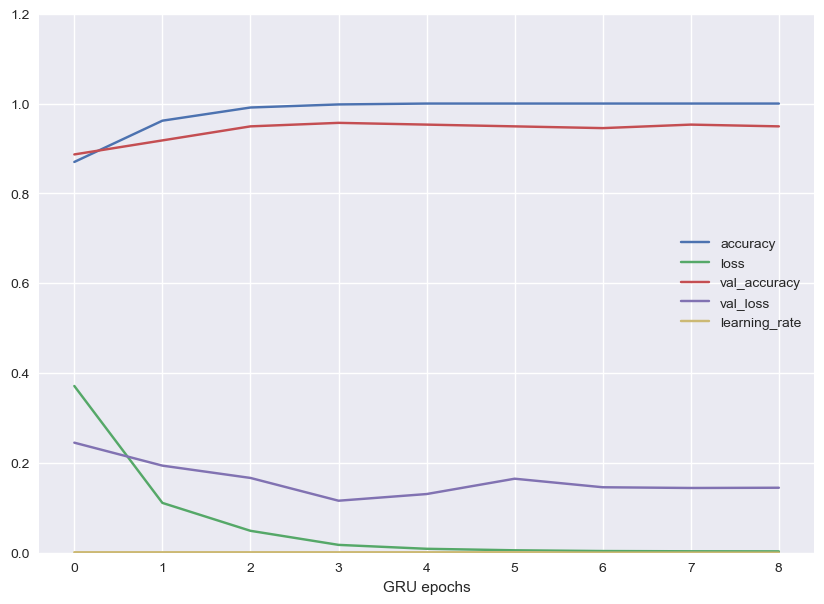

In [30]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.gca().set_ylim(0,1.2)
plt.xlabel("GRU epochs")
plt.show()

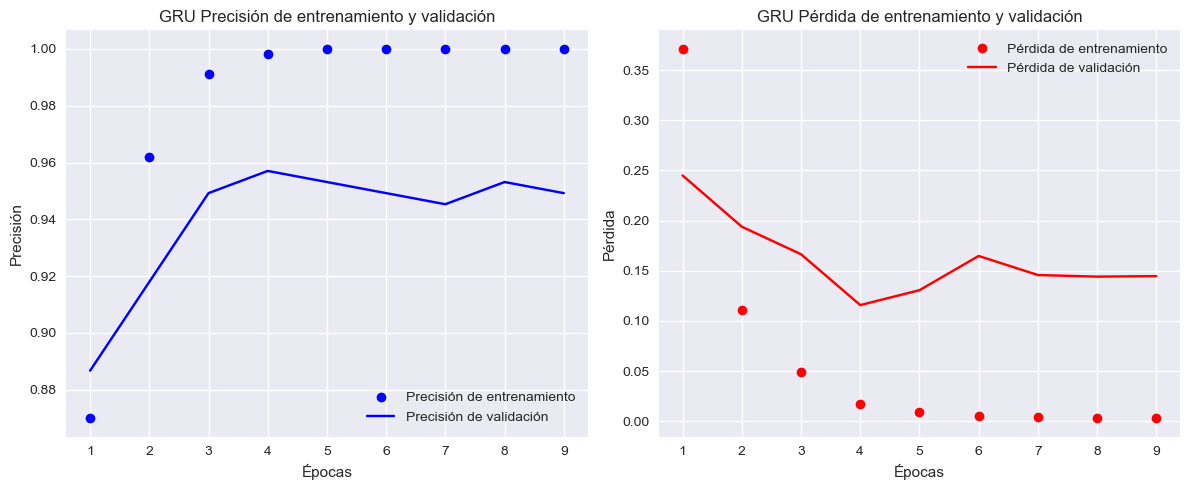

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Precisión de entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Precisión de validación')
plt.title('GRU Precisión de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'ro', label='Pérdida de entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida de validación')
plt.title('GRU Pérdida de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


In [32]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Pérdida en el conjunto de prueba: {test_loss}')
print(f'Precisión en el conjunto de prueba: {test_accuracy}')


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9589 - loss: 0.1099
Pérdida en el conjunto de prueba: 0.13014183938503265
Precisión en el conjunto de prueba: 0.9484777450561523


In [33]:
y_pred_val = np.argmax(model.predict(X_val), axis=-1)
y_pred_test = np.argmax(model.predict(X_test), axis=-1)

metricas_val = calcular_metricas(y_val, y_pred_val)
metricas_test = calcular_metricas(y_test, y_pred_test)

resultados = pd.DataFrame({'Validación': metricas_val, 'Test': metricas_test})

print(resultados)


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step
           Validación      Test
Accuracy     0.953052  0.948478
Precision    0.952496  0.949551
Recall       0.951416  0.949849
F1 Score     0.951903  0.949217


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step


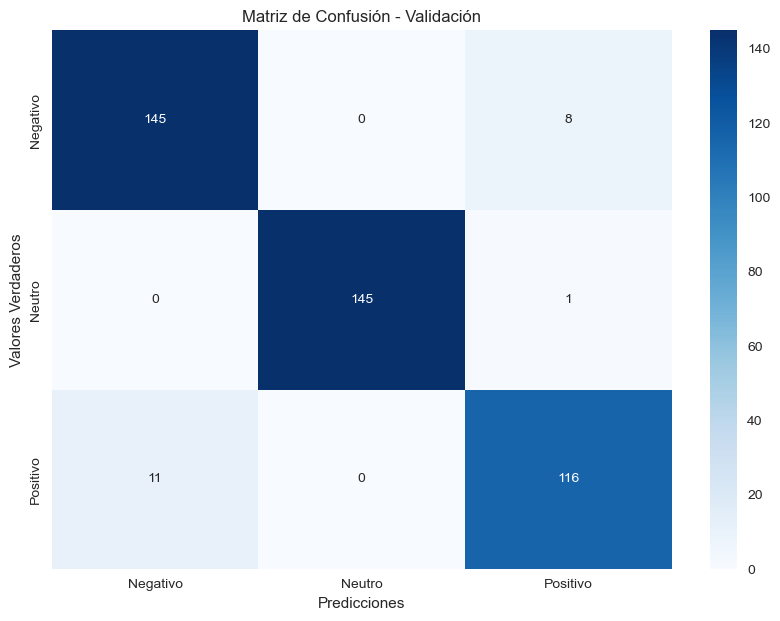

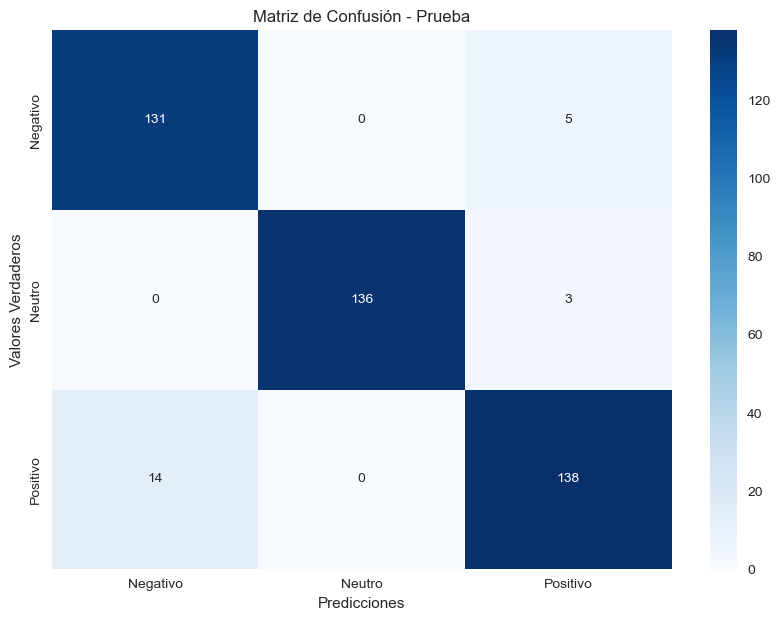

In [34]:
y_pred_val = np.argmax(model.predict(X_val), axis=-1)
y_pred_test = np.argmax(model.predict(X_test), axis=-1)

plot_confusion_matrix(y_val, y_pred_val, title='Matriz de Confusión - Validación')

plot_confusion_matrix(y_test, y_pred_test, title='Matriz de Confusión - Prueba')


# SVM

In [35]:
svm_model = SVC(kernel='rbf')
param_grid = {
    'C': [0.1, 1, 10, 100],  
    'gamma': [1, 0.1, 0.01, 0.001]  
}

In [36]:
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train_SVM, y_train)

print(f"Mejores hiperparámetros: {grid_search.best_params_}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   2.3s
[CV] END .....................................C=0.1, gamma=1; total time=   2.2s
[CV] END .....................................C=0.1, gamma=1; total time=   2.2s
[CV] END .....................................C=0.1, gamma=1; total time=   2.1s
[CV] END .....................................C=0.1, gamma=1; total time=   2.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   2.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   2.2s
[CV] END ...................................C=0.1, gamma=0.1; total time=   2.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   2.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   2.1s
[CV] END ..................................C=0.1, gamma=0.01; total time=   2.1s
[CV] END ..................................C=0.1

In [37]:
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test)

In [38]:
y_pred_val = best_svm_model.predict(X_val)
y_pred_test = best_svm_model.predict(X_test)
metricas_val = calcular_metricas(y_val, y_pred_val)
metricas_test = calcular_metricas(y_test, y_pred_test)
resultados = pd.DataFrame({'Validación': metricas_val, 'Test': metricas_test})
resultados

,Validación,Test
Accuracy,0.927230,0.908665
Precision,0.937881,0.916168
Recall,0.919660,0.913858
F1 Score,0.923252,0.907962


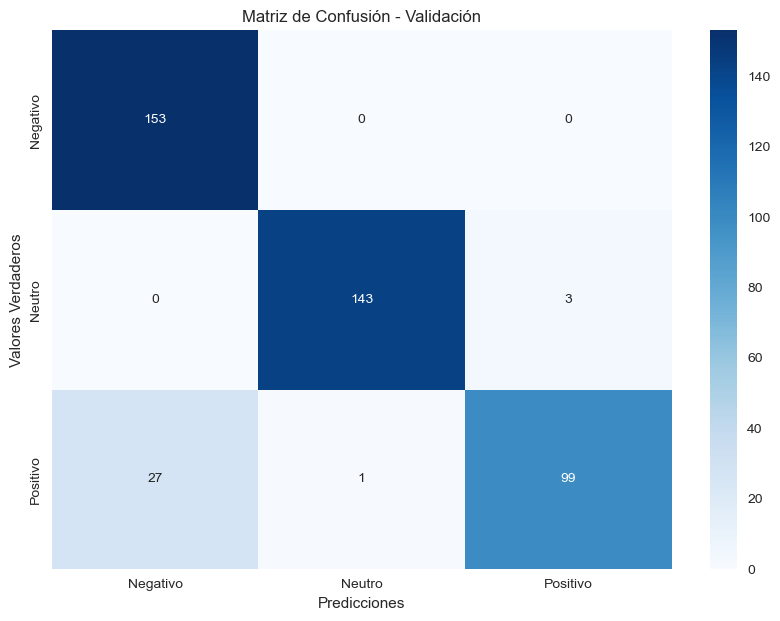

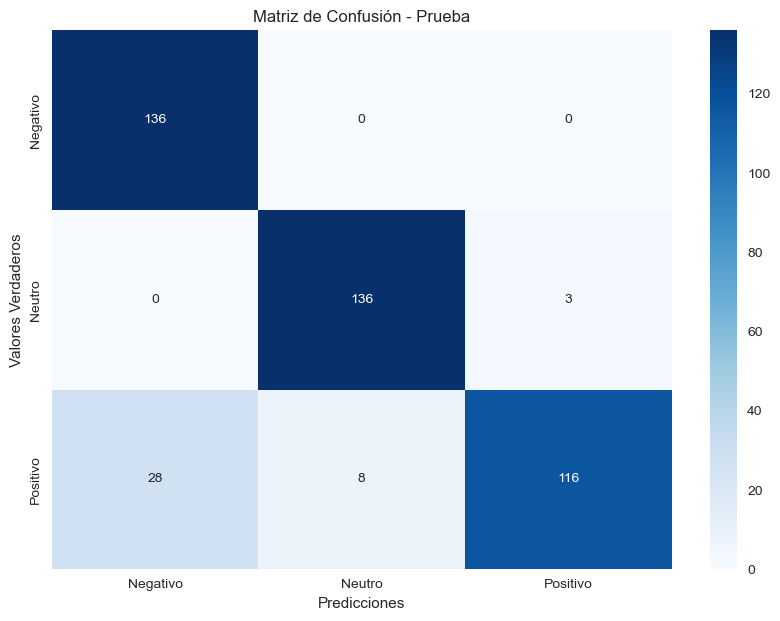

In [39]:
plot_confusion_matrix(y_val, y_pred_val, title='Matriz de Confusión - Validación')

plot_confusion_matrix(y_test, y_pred_test, title='Matriz de Confusión - Prueba')

# Random Forest

In [40]:
train_set, val_set, test_set = train_val_test_split(df)
X_train, y_train = remove_labels(train_set, 'label')
X_val, y_val = remove_labels(val_set, 'label')
X_test, y_test = remove_labels(test_set, 'label')

In [41]:
noise_factor = 0.5

X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)

In [42]:
random_forest_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,              
    min_samples_split=10,       
    min_samples_leaf=4,         
    max_features='sqrt',        
    random_state=42,
    ccp_alpha=0.001             
)

random_forest_model.fit(X_train, y_train)

RandomForestClassifier(ccp_alpha=0.001, max_depth=10, min_samples_leaf=4,
                       min_samples_split=10, random_state=42)

In [43]:
y_pred_test = random_forest_model.predict(X_test)
y_pred_val = random_forest_model.predict(X_val)

metricas_test = calcular_metricas(y_test, y_pred_test)
metricas_val = calcular_metricas(y_val, y_pred_val)
resultados = pd.DataFrame({'Validación': metricas_val, 'Test': metricas_test})

print(resultados)

           Validación      Test
Accuracy     0.978873  0.983607
Precision    0.978207  0.983648
Recall       0.978608  0.984444
F1 Score     0.978399  0.983799


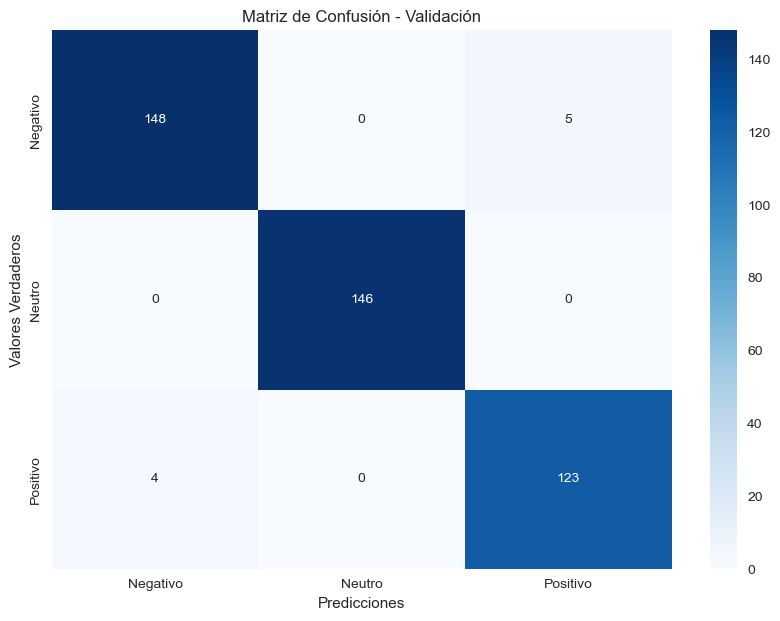

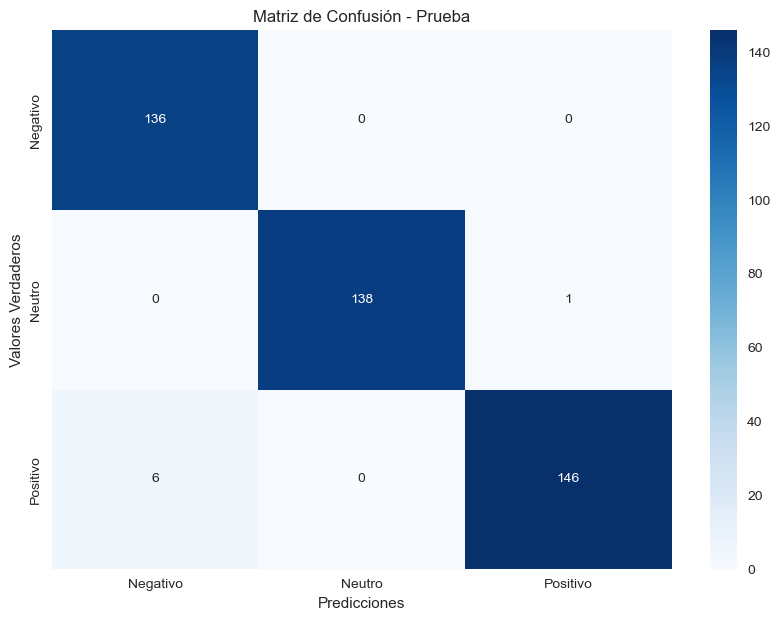

In [44]:
plot_confusion_matrix(y_val, y_pred_val, title='Matriz de Confusión - Validación')

plot_confusion_matrix(y_test, y_pred_test, title='Matriz de Confusión - Prueba')

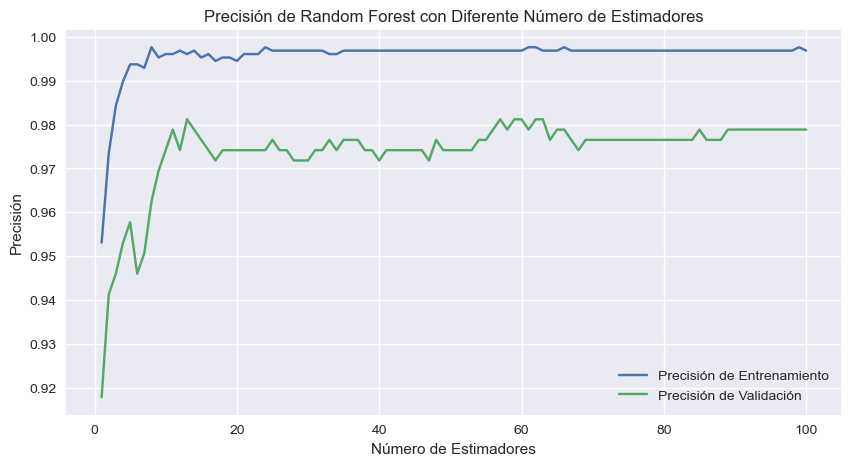

In [45]:
train_accuracies = []
val_accuracies = []
n_estimators_range = range(1, 101)  
for n_estimators in n_estimators_range:
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=10,
        min_samples_split=10,
        min_samples_leaf=4,
        max_features='sqrt',
        random_state=42,
        ccp_alpha=0.001
    )
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_accuracy)

plt.figure(figsize=(10, 5))
plt.plot(n_estimators_range, train_accuracies, label='Precisión de Entrenamiento')
plt.plot(n_estimators_range, val_accuracies, label='Precisión de Validación')
plt.xlabel('Número de Estimadores')
plt.ylabel('Precisión')
plt.title('Precisión de Random Forest con Diferente Número de Estimadores')
plt.legend()
plt.show()
